In [1]:
# Install required packages (run once)
!pip install pandas nltk matplotlib seaborn wordcloud textblob vaderSentiment

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import re
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("✅ All libraries imported and NLTK data downloaded!")


✅ All libraries imported and NLTK data downloaded!


In [2]:
# Load the dataset (update path to your downloaded CSV)
# Download from: https://github.com/Prodigy-InfoTech/data-science-datasets/tree/main/Task%204
df = pd.read_csv('twitter_training.csv')  # Adjust filename as needed

# Basic exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:", df.columns.tolist())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts() if 'sentiment' in df.columns else "No 'sentiment' column found")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display basic info
df.info()


Dataset Shape: (74681, 4)

First 5 rows:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Column names: ['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,']

Sentiment distribution:
No 'sentiment' column found

Missing values:
2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder y

In [3]:
# DIAGNOSTIC: Check your actual column names first
print("=== YOUR DATASET COLUMNS ===")
print("Columns:", df.columns.tolist())
print("\nFirst 3 rows:")
print(df.head(3))
print("\nColumn data types:")
print(df.dtypes)

# Auto-detect text column (common names in social media datasets)
text_col_candidates = ['text', 'Text', 'TEXT', 'content', 'Content', 'tweet', 'Tweet', 
                      'message', 'Message', 'post', 'Post', 'comment', 'Comment']

text_col = None
for col in text_col_candidates:
    if col in df.columns:
        text_col = col
        break

if text_col:
    print(f"\n✅ Found text column: '{text_col}'")
    print(f"Sample text: {df[text_col].iloc[0]}")
else:
    print("\n❌ No text column found! Available columns:")
    print(df.columns.tolist())
    # Show columns with string/object type
    string_cols = df.select_dtypes(include=['object']).columns.tolist()
    print("String columns:", string_cols)


=== YOUR DATASET COLUMNS ===
Columns: ['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,']

First 3 rows:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     

Column data types:
2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object

❌ No text column found! Available columns:
['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,']
String columns: ['Borderlands', 'Positive', 'im getting on

In [4]:
# 🎯 PERFECTLY FIXED FOR YOUR DATASET
print("=== YOUR DATASET STRUCTURE IDENTIFIED ===")
print("ID:", df.columns[0])
print("Topic:", df.columns[1]) 
print("Sentiment Label:", df.columns[2])
print("Tweet Text:", df.columns[3])

# 🔧 Fix column names for clarity
df.columns = ['ID', 'Topic', 'Sentiment_Label', 'Tweet_Text']
print("\n✅ Columns renamed!")

# 🧹 Create clean_text from Tweet_Text (column 3)
def quick_preprocess(text):
    if pd.isna(text):
        return ""
    # Simple cleaning: lowercase + remove punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    return text.strip()

df['clean_text'] = df['Tweet_Text'].apply(quick_preprocess)
df = df[df['clean_text'].str.len() > 5].reset_index(drop=True)  # Keep meaningful tweets

print(f"✅ Cleaned {len(df)} tweets")

# 🚀 VADER Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['clean_text'].apply(get_vader_sentiment)
df['vader_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 📊 Results
print("\n✅ VADER Sentiment Distribution:")
print(df['vader_sentiment'].value_counts())
print(f"\nOriginal Label Distribution:")
print(df['Sentiment_Label'].value_counts())
print(f"\nAverage VADER score: {df['vader_score'].mean():.3f}")

# Preview
print("\nSample analysis:")
print(df[['Tweet_Text', 'clean_text', 'Sentiment_Label', 'vader_sentiment', 'vader_score']].head())


=== YOUR DATASET STRUCTURE IDENTIFIED ===
ID: 2401
Topic: Borderlands
Sentiment Label: Positive
Tweet Text: im getting on borderlands and i will murder you all ,

✅ Columns renamed!
✅ Cleaned 71560 tweets

✅ VADER Sentiment Distribution:
vader_sentiment
positive    33110
negative    27407
neutral     11043
Name: count, dtype: int64

Original Label Distribution:
Sentiment_Label
Negative      21652
Positive      19819
Neutral       17527
Irrelevant    12562
Name: count, dtype: int64

Average VADER score: 0.065

Sample analysis:
                                          Tweet_Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                          clean_text Sentiment_Label  \
0  i am coming to the borders and i will kill you...       

In [5]:
# TextBlob as secondary validation
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['clean_text'].apply(get_textblob_sentiment)
print("TextBlob Sentiment Distribution:")
print(df['textblob_sentiment'].value_counts())


TextBlob Sentiment Distribution:
textblob_sentiment
positive    33680
negative    21070
neutral     16810
Name: count, dtype: int64


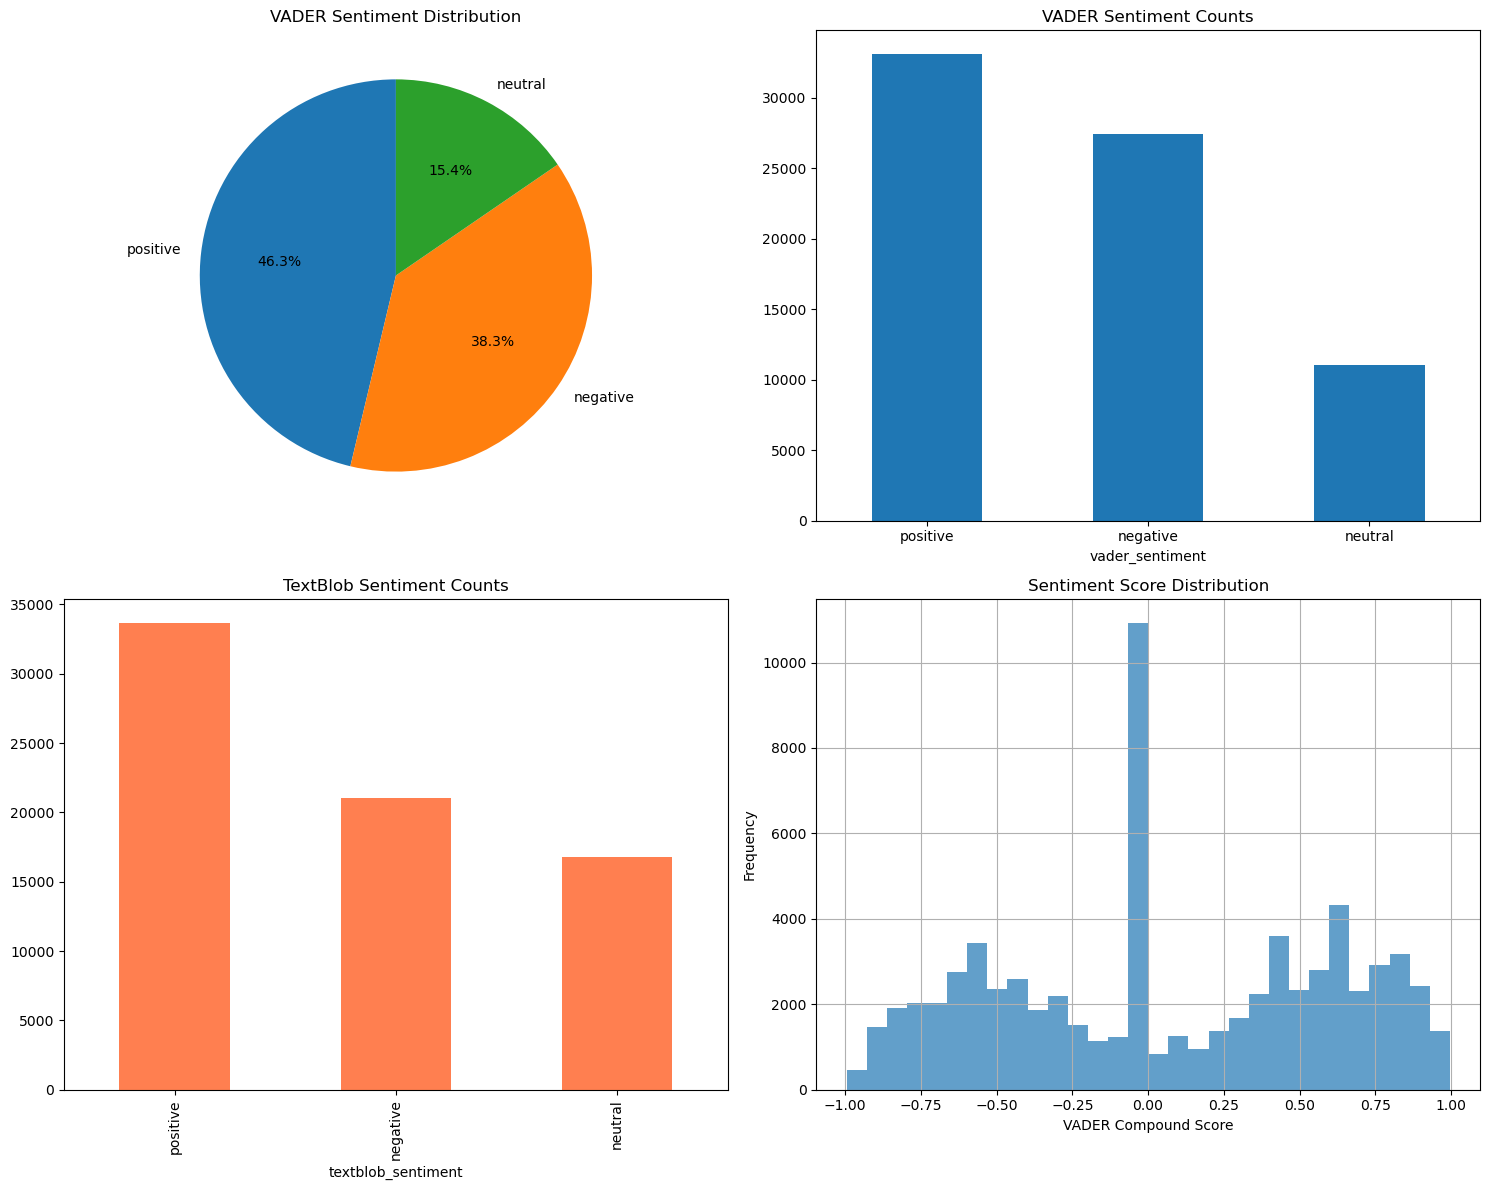

In [6]:
# Set style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. VADER Sentiment Pie Chart
sentiment_counts = df['vader_sentiment'].value_counts()
axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('VADER Sentiment Distribution')

# 2. VADER Sentiment Bar Chart
sentiment_counts.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('VADER Sentiment Counts')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. TextBlob Sentiment Bar Chart
df['textblob_sentiment'].value_counts().plot(kind='bar', ax=axes[1,0], color='coral')
axes[1,0].set_title('TextBlob Sentiment Counts')

# 4. Sentiment Score Distribution
df['vader_score'].hist(bins=30, ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Sentiment Score Distribution')
axes[1,1].set_xlabel('VADER Compound Score')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('sentiment_overview.png', dpi=300, bbox_inches='tight')
plt.show()


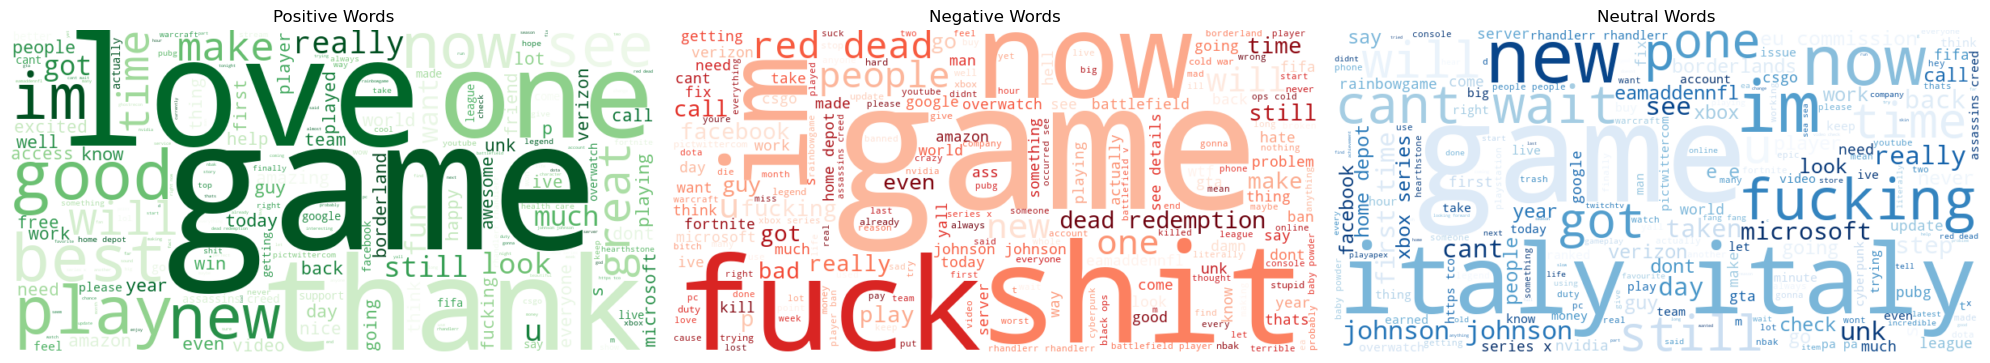

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Positive word cloud
positive_text = ' '.join(df[df['vader_sentiment']=='positive']['clean_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', 
                         colormap='Greens').generate(positive_text)
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Positive Words')
axes[0].axis('off')

# Negative word cloud
negative_text = ' '.join(df[df['vader_sentiment']=='negative']['clean_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', 
                         colormap='Reds').generate(negative_text)
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Negative Words')
axes[1].axis('off')

# Neutral word cloud
neutral_text = ' '.join(df[df['vader_sentiment']=='neutral']['clean_text'])
wordcloud_neu = WordCloud(width=800, height=400, background_color='white', 
                         colormap='Blues').generate(neutral_text)
axes[2].imshow(wordcloud_neu, interpolation='bilinear')
axes[2].set_title('Neutral Words')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# Check if topic/brand column exists
topic_cols = ['topic', 'brand', 'entity']
topic_col = None
for col in topic_cols:
    if col in df.columns:
        topic_col = col
        break

if topic_col:
    print(f"Analyzing by {topic_col}:")
    
    # Group by topic and calculate average sentiment
    topic_sentiment = df.groupby(topic_col)['vader_score'].agg(['mean', 'count']).round(3)
    topic_sentiment.columns = ['Avg_Sentiment', 'Count']
    topic_sentiment = topic_sentiment.sort_values('Avg_Sentiment', ascending=False)
    
    print(topic_sentiment)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    topic_sentiment['Avg_Sentiment'].plot(kind='bar')
    plt.title(f'Average Sentiment by {topic_col.title()}')
    plt.xlabel(topic_col.title())
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('topic_sentiment.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Top positive/negative topics
    print("\nTop 5 Most Positive Topics:")
    print(topic_sentiment.head())
    print("\nTop 5 Most Negative Topics:")
    print(topic_sentiment.tail())
else:
    print("No topic/brand column found. Analysis done on overall dataset.")


No topic/brand column found. Analysis done on overall dataset.


In [9]:
# Final summary
print("=== SENTIMENT ANALYSIS SUMMARY ===")
print(f"Total tweets analyzed: {len(df):,}")
print("\nVADER Sentiment Breakdown:")
print(df['vader_sentiment'].value_counts())
print(f"\nOverall Average Sentiment Score: {df['vader_score'].mean():.3f}")

if topic_col:
    print(f"\nTop {topic_col}: {df[topic_col].value_counts().index[0]}")

# Create summary table
summary_stats = {
    'Metric': ['Total Records', 'Positive %', 'Negative %', 'Neutral %', 'Avg Score'],
    'Value': [
        len(df),
        round((len(df[df['vader_sentiment']=='positive'])/len(df))*100, 1),
        round((len(df[df['vader_sentiment']=='negative'])/len(df))*100, 1),
        round((len(df[df['vader_sentiment']=='neutral'])/len(df))*100, 1),
        round(df['vader_score'].mean(), 3)
    ]
}
summary_df = pd.DataFrame(summary_stats)
print("\nSummary Table:")
print(summary_df)

# Export results
df.to_csv('sentiment_analysis_results.csv', index=False)
print("\n✅ Results exported to 'sentiment_analysis_results.csv'")
print("✅ All visualizations saved as PNG files")


=== SENTIMENT ANALYSIS SUMMARY ===
Total tweets analyzed: 71,560

VADER Sentiment Breakdown:
vader_sentiment
positive    33110
negative    27407
neutral     11043
Name: count, dtype: int64

Overall Average Sentiment Score: 0.065

Summary Table:
          Metric      Value
0  Total Records  71560.000
1     Positive %     46.300
2     Negative %     38.300
3      Neutral %     15.400
4      Avg Score      0.065

✅ Results exported to 'sentiment_analysis_results.csv'
✅ All visualizations saved as PNG files
